<a href="https://colab.research.google.com/github/DevanshChoubey/WaterMark_Removal/blob/master/Copy_of_Network_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#credit to pascal voc 2008 data set

@misc{pascal-voc-2008,
	author = "Everingham, M. and Van~Gool, L. and Williams, C. K. I. and Winn, J. and Zisserman, A.",
	title = "The {PASCAL} {V}isual {O}bject {C}lasses {C}hallenge 2008 {(VOC2008)} {R}esults",
	howpublished = "http://www.pascal-network.org/challenges/VOC/voc2008/workshop/index.html"}

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir("/content/drive/My Drive/Working_dir")

#### Import the data from the folders created to hold the original images and their corresponding image with a watermark. Standardize and reshape the images to fit into the network. 

In [0]:
raw_dir = 'RAWS/'
wat_dir = 'WATS/'

raw_datagen = ImageDataGenerator(rescale=1./255)

raw_generator = raw_datagen.flow_from_directory(
        raw_dir,  # this is the target directory
        target_size=(250, 250),
        batch_size=5096, shuffle = 0,
        class_mode="categorical")

wat_datagen = ImageDataGenerator(rescale=1./255)

wat_generator = wat_datagen.flow_from_directory(
        wat_dir,  # this is the target directory
        target_size=(250, 250),
        batch_size=5096, shuffle = 0,
        class_mode="categorical")

x_raw,y = raw_generator.next()
x_wat,y = wat_generator.next()

Found 5096 images belonging to 1 classes.
Found 5096 images belonging to 1 classes.


#### Split the data into training and validation sets. 

In [0]:
x_train_raw = x_raw[0:4500]
x_train_wat = x_wat[0:4500]

x_val_raw = x_raw[4500:4900]
x_val_wat = x_wat[4500:4900]

x_train = np.vstack((x_train_raw, x_train_wat))
x_val = np.vstack((x_val_raw, x_val_wat))

In [0]:
y_train = np.repeat([0.], 4500)
y_train = np.append(y_train, np.repeat([1.], 4500))

y_val = np.repeat([0.], 400)
y_val = np.append(y_val, np.repeat([1.], 400))

#### Create the response variables for each data set: images with a watermark have a response of 1, while images without a watermark have a response of 0. 

In [0]:
model = keras.models.Sequential()
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.Conv2D(100, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Conv2D(75, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(202, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(40, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
#model.summary()
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, 
          batch_size = 40, verbose = 0)

Train on 9000 samples, validate on 800 samples
Epoch 1/30
9000/9000 [==============================] - 26s 3ms/sample - loss: 0.7138 - acc: 0.5132 - val_loss: 0.6797 - val_acc: 0.5550
Epoch 2/30
9000/9000 [==============================] - 19s 2ms/sample - loss: 0.6238 - acc: 0.6436 - val_loss: 0.4967 - val_acc: 0.7625
Epoch 3/30
9000/9000 [==============================] - 19s 2ms/sample - loss: 0.5295 - acc: 0.7329 - val_loss: 0.4411 - val_acc: 0.7987
Epoch 4/30
9000/9000 [==============================] - 19s 2ms/sample - loss: 0.4701 - acc: 0.7747 - val_loss: 0.4204 - val_acc: 0.7962
Epoch 5/30
9000/9000 [==============================] - 19s 2ms/sample - loss: 0.4432 - acc: 0.7971 - val_loss: 0.3887 - val_acc: 0.8350
Epoch 6/30
9000/9000 [==============================] - 19s 2ms/sample - loss: 0.3938 - acc: 0.8183 - val_loss: 0.3904 - val_acc: 0.8300
Epoch 7/30
9000/9000 [==============================] - 19s 2ms/sample - loss: 0.3801 - acc: 0.8312 - val_loss: 0.4616 - val_acc: 0

In [0]:
#write the history to a csv for use in plotting

df = pd.DataFrame(history.history)
df.to_csv('history.csv')

In [0]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2008/VOCtrainval_14-Jul-2008.tar
!tar -xvf /content/VOCtrainval_14-Jul-2008.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2008/JPEGImages/2008_002813.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002814.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002817.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002820.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002823.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002826.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002829.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002830.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002831.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002834.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002835.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002838.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002842.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002843.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002845.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002847.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002848.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002850.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002852.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002854.jpg
VOCdevkit/VOC2008/JPEGImages/2008_002856.jpg
VOCd

In [0]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw, ImageOps
import string
import numpy as np
import cv2
import os 
os.chdir("/content/Working_dir")

In [0]:
#!wget https://github.com/frlim/data2040_final/blob/master/Project3/abel-regular.ttf

prints = list(string.printable)[0:84]

def gen_watermark(im_str, train = 1):
    
    #open all of the images from the VOC2008 dataset as jpegs
    img = Image.open("VOCdevkit/VOC2008/JPEGImages/{}".format(im_str))
    
    #save original image as np array to 'RAWS' directory
    img.save('RAWS/raw_imgs/{}'.format(im_str))
    
    #generate random font size between 30-100
    font_size = np.random.randint(low = 20, high = 100)
    
    #create the watermark font for the image
    font = ImageFont.truetype("abel-regular.ttf", font_size,encoding="unic") 
    
    #generate image to hold the watermark text object
    img_temp = Image.new('L', (350,350))
    
    #create the watermark text, of random length, using random printable characters
    text_str = np.random.choice(prints, np.random.randint(low=5, high = 10))
    text_str = "".join(text_str)
    
    #draw on temporary image with text
    draw_temp = ImageDraw.Draw(img_temp) 
    
    #generate a random integer for the opacity argument (fill)
    opac = np.random.randint(low=90, high=120)
    
    #insert text onto the temporary image
    draw_temp.text((0, 0), text_str,  font=font, fill=opac)
    
    #generate a random integer for rotation:
    rot_int = np.random.randint(low = 0, high = 20)
    
    #rotate the text on the temporary image
    rotated_text = img_temp.rotate(rot_int,  expand=1)
    
    #default color of watermark set to white; change if desired
    col_1 = (255,255,255)
    col_2 = (255,255,255)
    
    #generate a random location for the watermark on the image
    rand_loc = tuple(np.random.randint(low=10,high=100, size = (2,)))
    
    #merge the temporary image with text with the image passed in 
    #third tuple also needs to be random: controls the location of the img
    img.paste(ImageOps.colorize(rotated_text, col_1, col_2), rand_loc,  rotated_text)
    
    #this yeilds a new image with a watermark
    #save this jpeg with a watermark to the WATS directory
    img.save('WATS/wat_imgs/{}'.format(im_str))

In [0]:
rpath = "RAWS"
wpath = "WATS"

if not os.path.exists(rpath):
    os.mkdir(rpath)
    os.mkdir("RAWS/raw_imgs")
else:
    shutil.rmtree(rpath)  
    
if not os.path.exists(wpath):
    os.mkdir(wpath)
    os.mkdir("WATS/wat_imgs")
else:
    shutil.rmtree(wpath)

In [0]:
import os
os.chdir("/content/drive/My Drive/Working_dir")

In [0]:
#generate 
im_list = os.listdir("VOCdevkit/VOC2008/JPEGImages")

#run time is about 5-6 minutes for all 5000 images:
for ind, img in enumerate(im_list):
    
    #add the watermark to the image and save to 'watered' directory
    wat_img = gen_watermark(img)

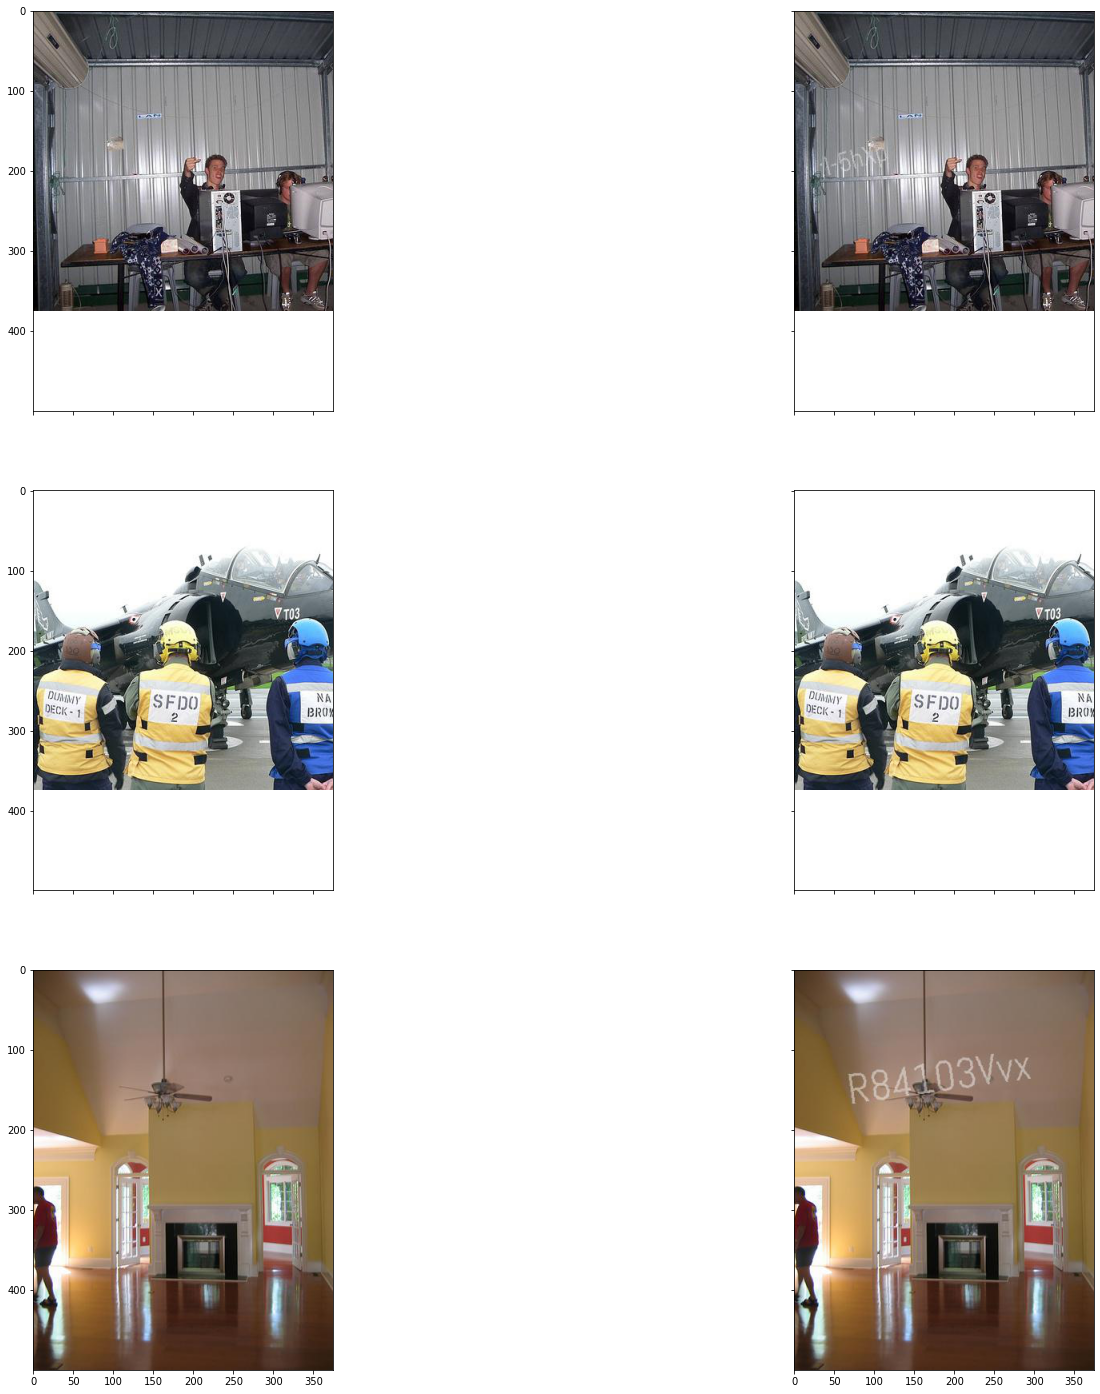

In [0]:
dir_raw = os.listdir("RAWS/raw_imgs")
dir_wats = os.listdir("WATS/wat_imgs")

#example: 
raw_str = "RAWS/raw_imgs/"
wat_str = "WATS/wat_imgs/"

f, axs = plt.subplots(3,2, figsize=(25, 25), sharey=True, sharex = True)
axs = axs.ravel()

img_raw = Image.open(raw_str + dir_raw[4])
img_wat = Image.open(wat_str + dir_wats[4])
axs[0].imshow(img_raw)
axs[1].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[5])
img_wat = Image.open(wat_str + dir_wats[5])
axs[2].imshow(img_raw)
axs[3].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[10])
img_wat = Image.open(wat_str + dir_wats[10])
axs[4].imshow(img_raw)
axs[5].imshow(img_wat)

plt.show()


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/Working_dir "/content/drive/My Drive"

In [0]:
a = []
while(1):
  a.append("1")

In [0]:
import torch 
import torch.nn as nn

class Discriminator(nn.Module):
  def __init__(self, channels_img, features_d):
    super(Discriminator, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(channels_img, features_d, kernel_size = 4, stride = 2, padding = 1),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_d, features_d *2, kernel_size = 4, stride = 2, padding = 1),
        nn.BatchNorm2d(features_d*2 ),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_d*2, features_d*4, kernel_size = 4, stride = 2, padding = 1),
        nn.BatchNorm2d(features_d*4),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_d*4, features_d*8, kernel_size = 4, stride = 2, padding = 1),
        nn.BatchNorm2d(features_d*8),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_d*8, 1 , kernel_size = 4, stride = 2, padding = 1),

        nn.Sigmoid()

    )

  def forward(self, x):
      return self.net(x)

class Generator(nn.Module):
  def __init__(self, channels_noise, channels_img, features_g):
    super(Generator, self).__init__()

    self.net = nn.Sequential(
        nn.ConvTranspose2d(channels_noise, features_g*16, kernel_size = 4, stride = 2, padding = 1),
        nn.BatchNorm2d(features_g*16),
        nn.ReLU(),

        nn.ConvTranspose2d(features_g*16, features_g*8, kernel_size = 4, stride = 2, padding = 1),
        nn.BatchNorm2d(features_g*8),
        nn.ReLU(),

        nn.ConvTranspose2d(features_g*8, features_g*4, kernel_size = 4, stride = 1, padding = 1),
        nn.BatchNorm2d(features_g*4),
        nn.ReLU(),

        nn.ConvTranspose2d(features_g*4, features_g*2, kernel_size = 4, stride = 1, padding = 1),
        nn.BatchNorm2d(features_g*2),
        nn.ReLU(),
        
        nn.ConvTranspose2d(features_g*2, channels_img, kernel_size = 4, stride = 2, padding = 1),
        nn.Tanh()


         
          )
    
  def forward(self, x):
      return self.net(x)

In [0]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter


################HyperParameter
lr = 0.0002
batch_size = 64
image_size = 64
channels_img = 1
channels_noise = 256
num_epochs = 10

features_d = 16
features_g = 16

my_transforms = transforms.Compose([
                                   transforms.Resize(image_size),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5), (0.5)),
])


dataset = datasets.MNIST(root = 'dataset/', train = True, transform = my_transforms, download = True)
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")


netD = Discriminator(channels_img, features_d).to(device)
netG = Generator(channels_noise, channels_img, features_g).to(device)


optimizerD = optim.Adam(netD.parameters(), lr = lr , betas = (0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr = lr, betas = (0.5, 0.999))


netG.train()
netD.train()

criterion = nn.BCELoss()

real_label = 1
fake_label = 0


fixed_noise = torch.randn(64, channels_noise, 1, 1).to(device)

print("stariting trainning")

writer_real = SummaryWriter(f'runs/GAN_MNIST/test_real') 
writer_fake = SummaryWriter(f'runs/GAN_MNIST/test_fake')

for epoch in range(num_epochs):

  for batch_id, (data, targets) in enumerate(dataloader):
    data = data.to(device)
    batch_size = data.shape[0]


    netD.zero_grad()

    label = (torch.ones(batch_size) * 0.9).to(device)

    output = netD(data).reshape(-1)

    lossD_real = criterion(output, label)

    D_x = output.mean().item()

    noise = torch.randn(batch_size, channels_noise, 1, 1).to(device)
    fake = netG(noise)
    label = (torch.ones(batch_size) * 0.1).to(device)

    output = netD(fake.detach()).reshape(-1)
    lossD_fake = criterion(output, label)

    lossD = lossD_real + lossD_fake

    lossD.backward()
    optimizerD.step()





    netG.zero_grad()
    label = torch.ones(batch_size).to(device)
    output = netD(fake).reshape(-1)
    lossG = criterion(output, label)
    lossG.backward()
    optimizer.backward()

    if batch_idx % 100 == 0:
      print(f'Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataLoader)} Loss D: {LossD:.4f}, Loss G:{LossG:.4f} D(x) : {D_x:4f}')

      with torch.no_grad():
        fake = netG(fixed_noise)
        img_grid_real = torchvision.utils.make_grid(data[:32], normalize)
        img_grid_fake = torchvision.utils.make_grid(fake[:32], normalize)

        writer_real.add_image('MNIST ral image', img_grid_real)
        writer_real.add_image('mnist', image_grid_fake)









stariting trainning


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([256])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


ValueError: ignored

In [0]:
import torch
import torchvision
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.datasets as datasets # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms # Transformations we can perform on our dataset
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
from torch.utils.tensorboard import SummaryWriter # to print to tensorboard
#from model_utils import Discriminator, Generator # Import our models we've defined (from DCGAN paper)

# Hyperparameters
lr = 0.0002
batch_size = 64
image_size = 64
channels_img = 1
channels_noise = 64
num_epochs = 10

# For how many channels Generator and Discriminator should use
features_d = 16
features_g = 16

my_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)),
    ])

dataset = datasets.MNIST(root='dataset/', train=True, transform=my_transforms, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create discriminator and generator
netD = Discriminator(channels_img, features_d).to(device)
netG = Generator(channels_noise, channels_img, features_g).to(device)

# Setup Optimizer for G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

netG.train()
netD.train()

criterion = nn.BCELoss()

real_label = 1
fake_label = 0

fixed_noise = torch.randn(64, channels_noise, 1, 1).to(device)
writer_real = SummaryWriter(f'runs/GAN_MNIST/test_real')
writer_fake = SummaryWriter(f'runs/GAN_MNIST/test_fake')

print("Starting Training...")

for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(dataloader):
        data = data.to(device)
        batch_size = data.shape[0]
        
        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        netD.zero_grad()
        label = (torch.ones(batch_size)*0.9).to(device)
        output = netD(data).reshape(-1)
        lossD_real = criterion(output, label)
        D_x = output.mean().item()
        
        noise = torch.randn(batch_size, channels_noise, 1, 1).to(device)
        fake = netG(noise)
        label = (torch.ones(batch_size)*0.1).to(device)
        
        output = netD(fake.detach()).reshape(-1)
        lossD_fake = criterion(output, label)
        
        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()
        
        ### Train Generator: max log(D(G(z)))
        netG.zero_grad()
        label = torch.ones(batch_size).to(device)
        output = netD(fake).reshape(-1)
        lossG = criterion(output, label)
        lossG.backward()
        optimizerG.step()
        
        # Print losses ocassionally and print to tensorboard
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(dataloader)} \
                  Loss D: {lossD:.4f}, loss G: {lossG:.4f} D(x): {D_x:.4f}')

            with torch.no_grad():
                fake = netG(fixed_noise)
                
                img_grid_real = torchvision.utils.make_grid(data[:32], normalize=True)
                img_grid_fake = torchvision.utils.make_grid(fake[:32], normalize=True)
                writer_real.add_image('Mnist Real Images', img_grid_real)
                writer_real.add_image('Mnist Fake Images', img_grid_fake)


        

Starting Training...
Epoch [0/10] Batch 0/938                   Loss D: 1.4547, loss G: 0.8541 D(x): 0.4694
Epoch [0/10] Batch 100/938                   Loss D: 0.6614, loss G: 2.7720 D(x): 0.9030
Epoch [0/10] Batch 200/938                   Loss D: 0.7238, loss G: 2.2709 D(x): 0.7909
Epoch [0/10] Batch 300/938                   Loss D: 1.1992, loss G: 3.2478 D(x): 0.9256
Epoch [0/10] Batch 400/938                   Loss D: 0.8595, loss G: 1.8494 D(x): 0.7905
Epoch [0/10] Batch 500/938                   Loss D: 1.0312, loss G: 0.8565 D(x): 0.5187
Epoch [0/10] Batch 600/938                   Loss D: 0.9726, loss G: 1.3046 D(x): 0.6756
Epoch [0/10] Batch 700/938                   Loss D: 1.2144, loss G: 4.3662 D(x): 0.9386
Epoch [0/10] Batch 800/938                   Loss D: 1.0992, loss G: 0.5041 D(x): 0.4869
Epoch [0/10] Batch 900/938                   Loss D: 1.0652, loss G: 1.1861 D(x): 0.7899
Epoch [1/10] Batch 0/938                   Loss D: 0.9108, loss G: 1.0411 D(x): 0.6758
Epoc

In [0]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            # N x channels_img x 64 x 64
            nn.Conv2d(channels_img, features_d, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            # N x features_d x 32 x 32
            nn.Conv2d(features_d, features_d*2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_d*2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features_d*2, features_d*4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_d*4),
            nn.LeakyReLU(0.2),
            nn.Conv2d(features_d*4, features_d*8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_d*8),
            nn.LeakyReLU(0.2),
            # N x features_d*8 x 4 x 4
            nn.Conv2d(features_d*8, 1, kernel_size=4, stride=2, padding=0),
            # N x 1 x 1 x 1
            nn.Sigmoid()
            )
    
    def forward(self, x):
        return self.net(x)

class Generator(nn.Module):
    def __init__(self, channels_noise, channels_img, features_g):
        super(Generator, self).__init__()
        
        self.net = nn.Sequential(
            # N x channels_noise x 1 x 1
            nn.ConvTranspose2d(channels_noise, features_g*16, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(features_g*16),
            nn.ReLU(),
            
            # N x features_g*16 x 4 x 4
            nn.ConvTranspose2d(features_g*16, features_g*8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_g*8),
            nn.ReLU(),
            
            nn.ConvTranspose2d(features_g*8, features_g*4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_g*4),
            nn.ReLU(),
            
            nn.ConvTranspose2d(features_g*4, features_g*2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(features_g*2),
            nn.ReLU(),
            
            nn.ConvTranspose2d(features_g*2, channels_img, kernel_size=4, stride=2, padding=1),
            # N x channels_img x 64 x 64
            nn.Tanh()
            )
    
    def forward(self, x):
        return self.net(x)

In [0]:
!tensorboard --logdir runs pass --bind_all

2020-05-24 17:51:33.826297: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   {serve,dev} ...
tensorboard: error: invalid choice: 'pass' (choose from 'ser

In [0]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)




In [0]:

! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-05-24 17:53:51--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.84.89.161, 18.213.76.145, 34.206.168.28, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.84.89.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  12.9MB/s    in 1.0s    

2020-05-24 17:53:52 (12.9 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://4ba46d36.ngrok.io


In [0]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

In [0]:
torch.save()